In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np


In [23]:

df = pd.read_csv("data/processed/returns_full.csv")
df['date'] = pd.to_datetime(df['date'])

display(df.head())

# 
print("Number of stock:", df['symbol'].nunique())
print("Stock code example:", df['symbol'].unique()[:10])


,symbol,date,open,high,low,close,volume,adjclose,dividends,splits,log_return
0,AAPL,2024-03-26,170.000000,171.419998,169.580002,169.710007,57388400,168.912415,0.0,NaN,-0.006695
1,AAPL,2024-03-27,170.410004,173.600006,170.110001,173.309998,60273300,172.495499,0.0,NaN,0.020991
2,AAPL,2024-03-28,171.750000,172.229996,170.509995,171.479996,65672700,170.674103,0.0,NaN,-0.010615
3,AAPL,2024-04-01,171.190002,171.250000,169.479996,170.029999,46240500,169.230911,0.0,NaN,-0.008492
4,AAPL,2024-04-02,169.080002,169.339996,168.229996,168.839996,49329500,168.046494,0.0,NaN,-0.007023


Number of stock: 99
Stock code example: ['AAPL' 'ABBV' 'ACN' 'ADBE' 'ADI' 'ADP' 'AIG' 'ALL' 'AMAT' 'AMGN']


In [24]:
df = pd.read_csv("data/processed/returns_full.csv")
df['date'] = pd.to_datetime(df['date'])

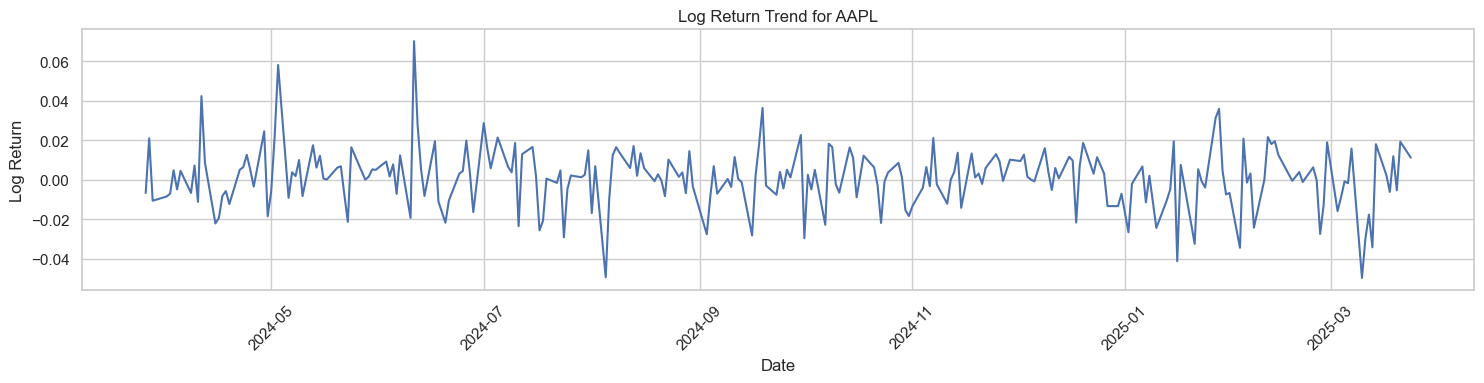

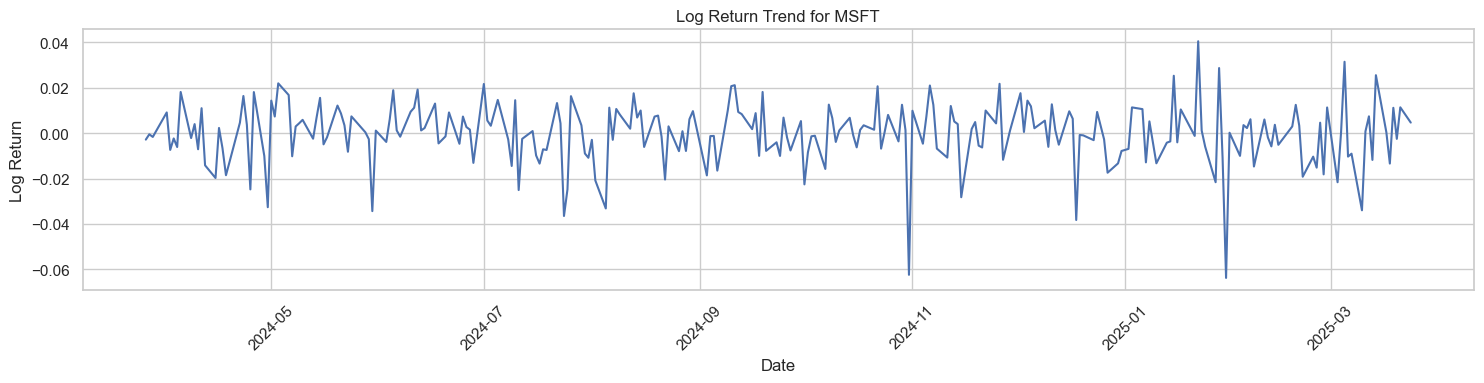

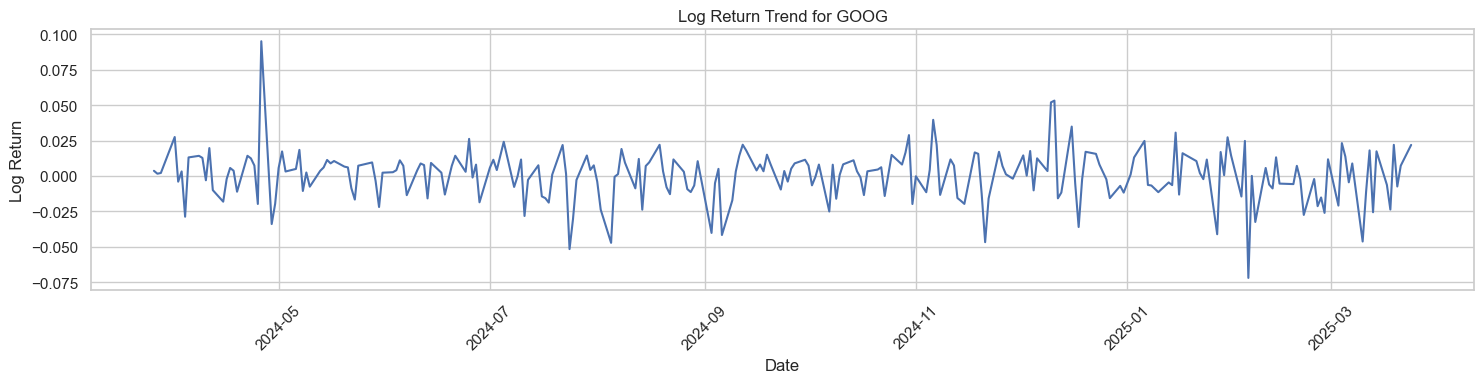

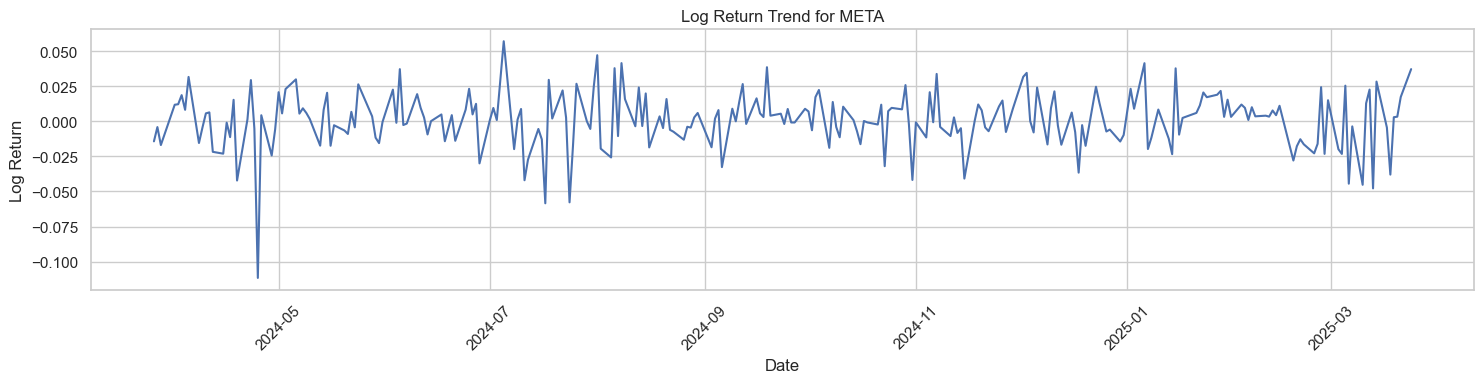

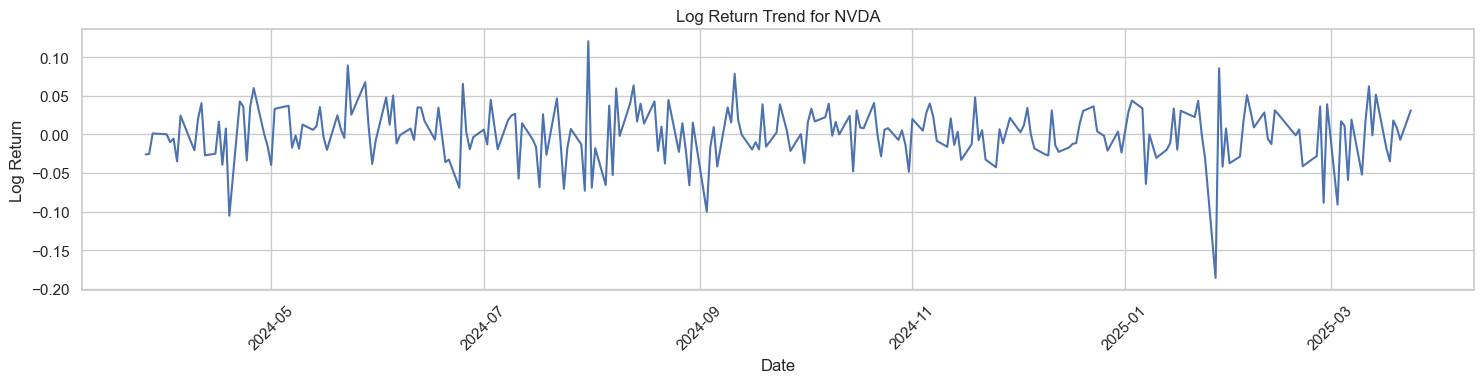

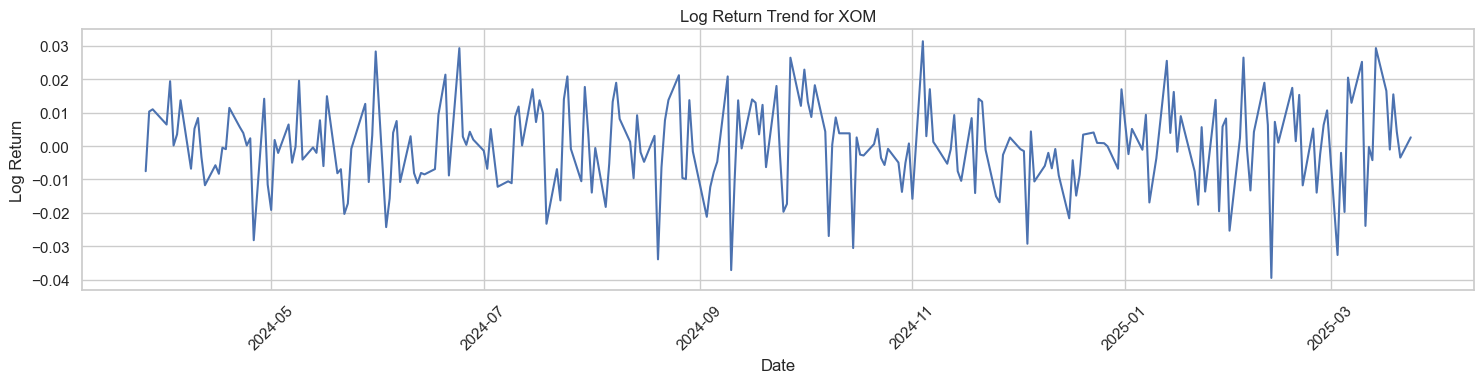

In [25]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (15, 4)

# Stocks under observation
selected_symbols = ['AAPL', 'MSFT', 'GOOG', 'META', 'NVDA', 'XOM']

# symbol
for symbol in selected_symbols:
    stock_df = df[df['symbol'] == symbol]
    
    plt.figure()
    sns.lineplot(x="date", y="log_return", data=stock_df)
    plt.title(f"Log Return Trend for {symbol}")
    plt.xlabel("Date")
    plt.ylabel("Log Return")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

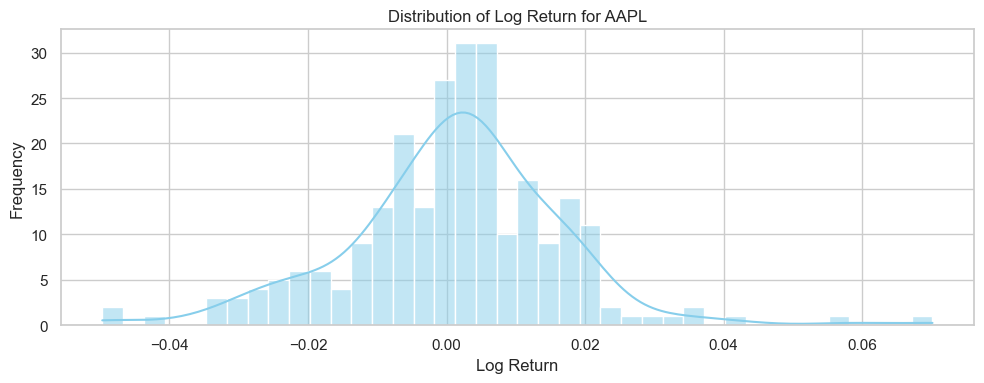

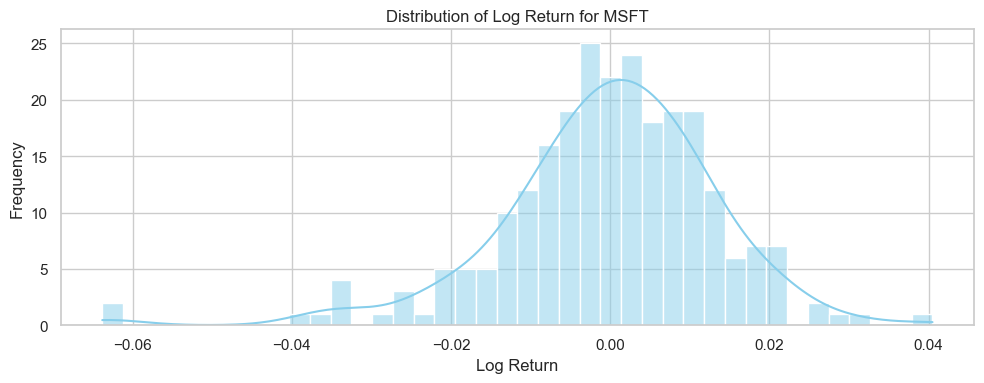

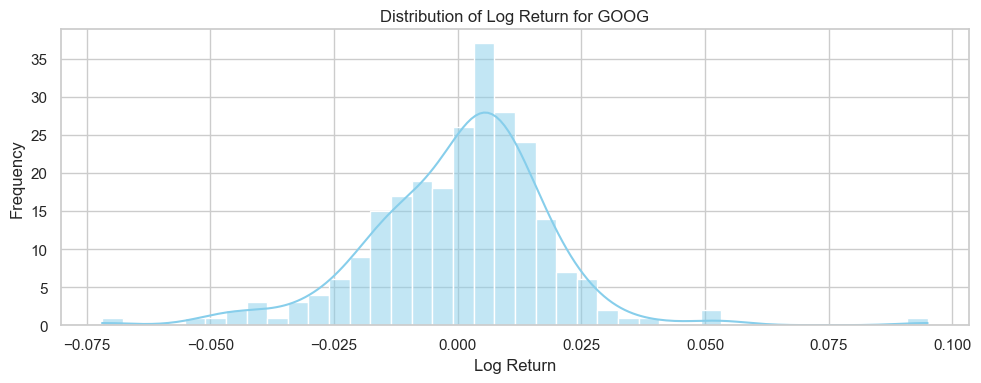

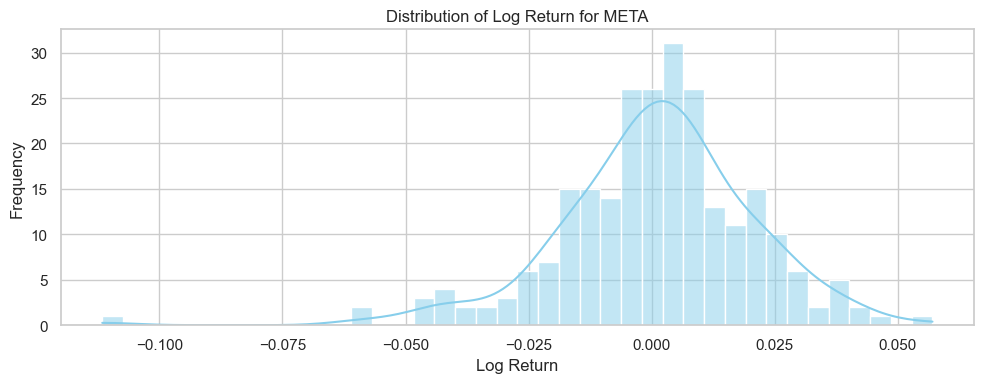

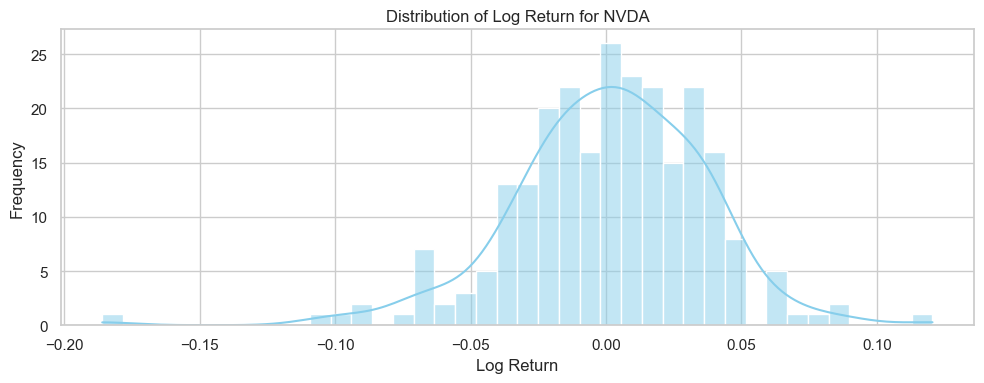

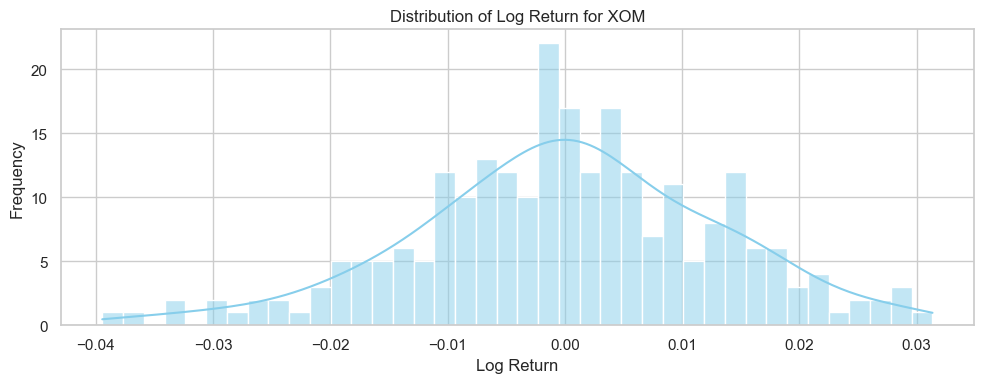

In [26]:

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 4)

# 
selected_symbols = ['AAPL', 'MSFT', 'GOOG', 'META', 'NVDA', 'XOM']

# 
for symbol in selected_symbols:
    stock_df = df[df['symbol'] == symbol]

    plt.figure()
    sns.histplot(stock_df['log_return'], kde=True, bins=40, color='skyblue')
    plt.title(f"Distribution of Log Return for {symbol}")
    plt.xlabel("Log Return")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

Annualized rate of return saved to: data/processed/annualized_returns.csv


/var/folders/w0/p53f__b5775fykd_h2t7wtqw0000gp/T/ipykernel_70613/604885813.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=annualized_returns_sorted[:20].index, y=annualized_returns_sorted[:20].values, palette="crest")


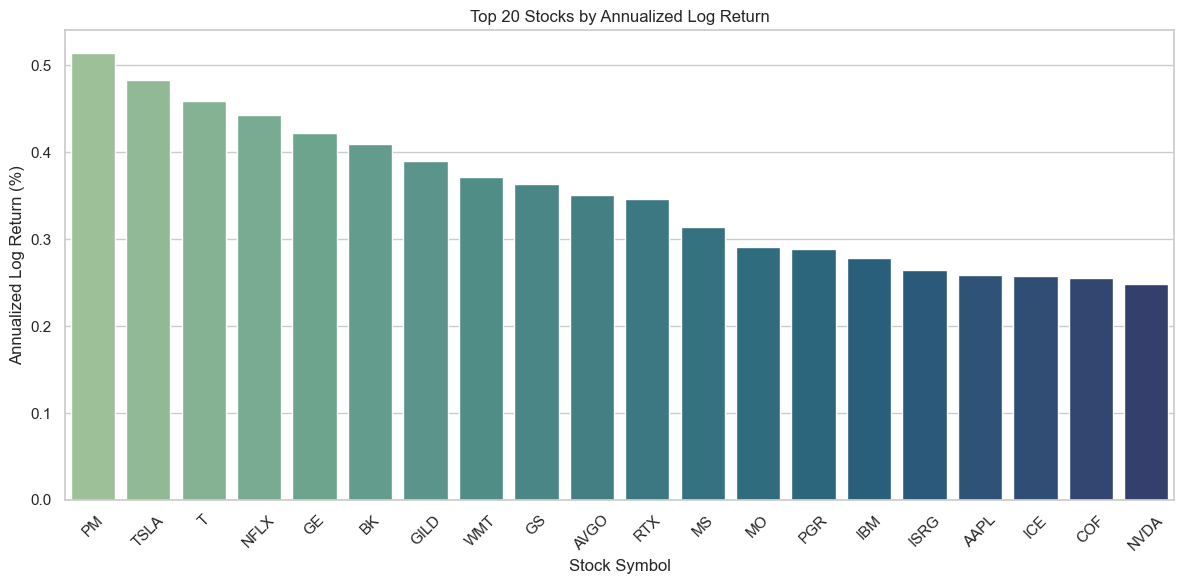

In [27]:
# annualized_returns
# daily log return
mean_returns = df.groupby("symbol")["log_return"].mean()

# Calculating Annualized returns (252 trading days)
annualized_returns = mean_returns * 252

# sort
annualized_returns_sorted = annualized_returns.sort_values(ascending=False)

# save csv
output_path = "data/processed/annualized_returns.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
annualized_returns_sorted.to_csv(output_path)
print(f"Annualized rate of return saved to: {output_path}")

# top20
plt.figure(figsize=(12, 6))
sns.barplot(x=annualized_returns_sorted[:20].index, y=annualized_returns_sorted[:20].values, palette="crest")
plt.title("Top 20 Stocks by Annualized Log Return")
plt.ylabel("Annualized Log Return (%)")
plt.xlabel("Stock Symbol")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Annualized volatility saved to:data/processed/annualized_volatility.csv


/var/folders/w0/p53f__b5775fykd_h2t7wtqw0000gp/T/ipykernel_70613/4133446986.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_volatility.index, y=top_volatility.values, palette="flare")


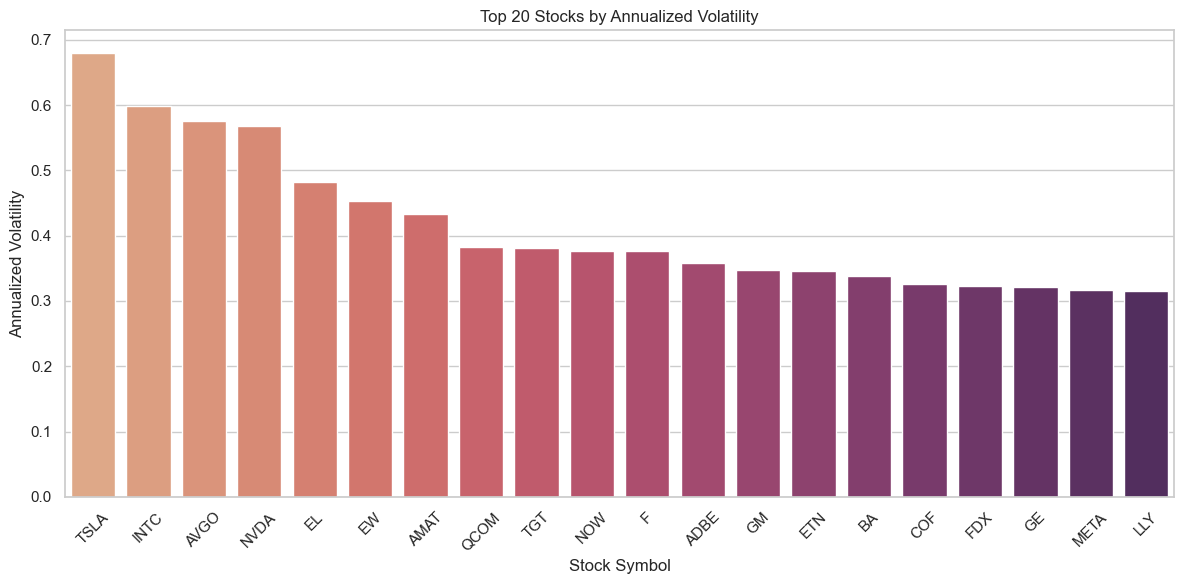

In [28]:
# Volatility Analysis
# The standard deviation of the log return for each stock
volatility = df.groupby("symbol")["log_return"].std()

# annualized volatility = std * sqrt(252)
annualized_volatility = volatility * np.sqrt(252)

# 
top_volatility = annualized_volatility.sort_values(ascending=False)[:20]

# save CSV
vol_path = "data/processed/annualized_volatility.csv"
os.makedirs(os.path.dirname(vol_path), exist_ok=True)
top_volatility.to_csv(vol_path)
print(f"Annualized volatility saved to:{vol_path}")

# 
plt.figure(figsize=(12, 6))
sns.barplot(x=top_volatility.index, y=top_volatility.values, palette="flare")
plt.title("Top 20 Stocks by Annualized Volatility")
plt.ylabel("Annualized Volatility")
plt.xlabel("Stock Symbol")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The yield-volatility ratio (Sharpe-like) has been saved to: data/processed/sharpe_like_ratio.csv


/var/folders/w0/p53f__b5775fykd_h2t7wtqw0000gp/T/ipykernel_70613/823091879.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sharpe_sorted[:20].index, y=sharpe_sorted[:20].values, palette="crest")


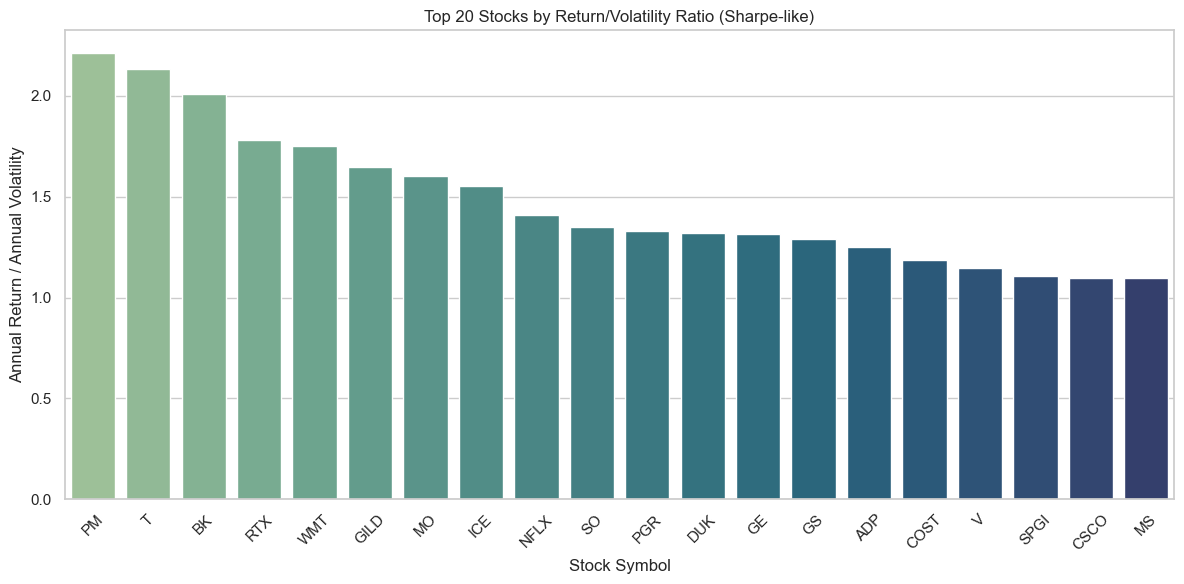

In [29]:
# Sharpe-like Ratio
# Calculate the return/risk of each stock
sharpe_like = annualized_returns / annualized_volatility

# sort
sharpe_sorted = sharpe_like.sort_values(ascending=False)

# save CSV
sharpe_path = "data/processed/sharpe_like_ratio.csv"
os.makedirs(os.path.dirname(sharpe_path), exist_ok=True)
sharpe_sorted.to_csv(sharpe_path)
print(f"The yield-volatility ratio (Sharpe-like) has been saved to: {sharpe_path}")

# 
plt.figure(figsize=(12, 6))
sns.barplot(x=sharpe_sorted[:20].index, y=sharpe_sorted[:20].values, palette="crest")
plt.title("Top 20 Stocks by Return/Volatility Ratio (Sharpe-like)")
plt.ylabel("Annual Return / Annual Volatility")
plt.xlabel("Stock Symbol")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Benchmark log return saved to: data/processed/benchmark_returns.csv


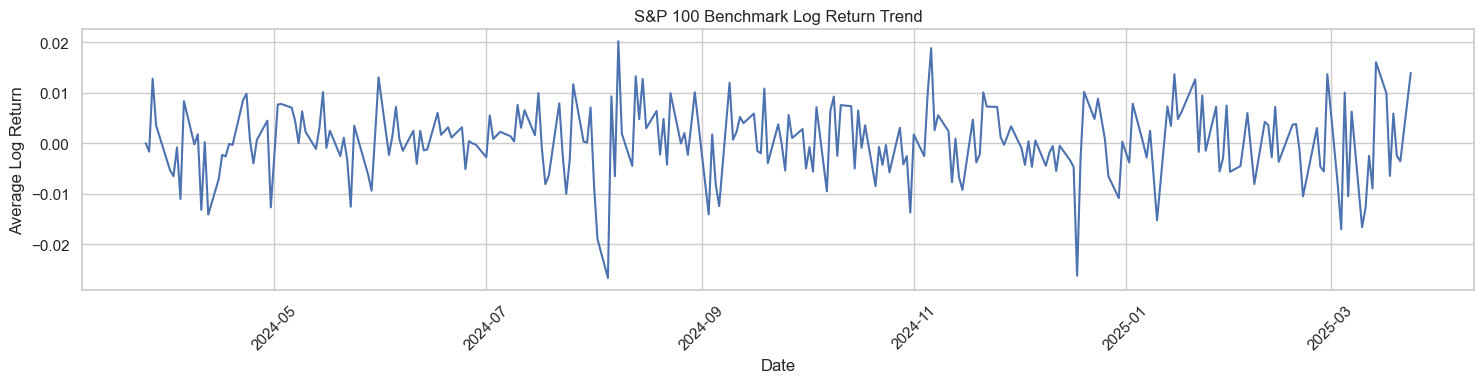

In [30]:
# Group by date, calculate benchmark: Average log return for all stocks
benchmark_df = df.groupby("date")["log_return"].mean().reset_index()
benchmark_df.rename(columns={"log_return": "benchmark_return"}, inplace=True)

# Save the benchmark to CSV for use by AMPL and other models
output_path = "data/processed/benchmark_returns.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
benchmark_df.to_csv(output_path, index=False)
print(f"Benchmark log return saved to: {output_path}")

#
plt.figure(figsize=(15, 4))
sns.lineplot(data=benchmark_df, x="date", y="benchmark_return")
plt.title("S&P 100 Benchmark Log Return Trend")
plt.xlabel("Date")
plt.ylabel("Average Log Return")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
from src.generate_ampl_data import generate_ampl_data

selected_symbols = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'META', 'NVDA', 'XOM', 'WMT', 'UNH', 'JNJ']
generate_ampl_data(
    input_path="data/processed/returns_full.csv",
    output_path="data/ampl/data.dat",
    selected_symbols=selected_symbols,
    q=len(selected_symbols)
)


AMPL data written to: data/ampl/data.dat


In [ ]:
from src.ampl_runner import run_ampl, parse_weights

# 
model_path = "data/ampl/model.mod"
data_path = "data/ampl/data.dat"
output_csv_path = "results/ampl_solution_raw.csv"        
csv_output_path = "results/ampl_weights.csv"             

# Run AMPL and save the raw results
run_ampl(model_path, data_path, output_csv_path)

# Parse the result and save it as a crisp CSV
parse_weights(output_csv_path, csv_output_path)



AMPL Execution failed:
Cannot find "cbc"

run_ampl_temp.run, line 6 (offset 109):
	w is not defined
context:  display w  >>> >  <<< results/ampl_solution_raw.csv;



FileNotFoundError: [Errno 2] No such file or directory: 'results/ampl_solution_raw.csv'